In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Asteroid_Updated.csv')
data.head()

C:\Users\ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [3]:
df = data[["q","ad"]]
df

,q,ad
0,2.558684,2.979647
1,2.133865,3.411067
2,1.983332,3.354967
3,2.151909,2.570926
4,2.082324,3.066174
...,...,...
839709,0.943214,4.682676
839710,1.959126,3.331350
839711,1.893638,2.852636
839712,1.676433,2.844376


In [4]:
df.isnull().sum()

q     0
ad    6
dtype: int64

In [5]:
df = df.dropna()
df

,q,ad
0,2.558684,2.979647
1,2.133865,3.411067
2,1.983332,3.354967
3,2.151909,2.570926
4,2.082324,3.066174
...,...,...
839709,0.943214,4.682676
839710,1.959126,3.331350
839711,1.893638,2.852636
839712,1.676433,2.844376


Text(0, 0.5, 'ad: aphelion distance(au)')

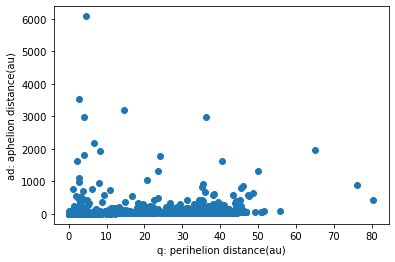

In [6]:
plt.scatter(df['q'], df['ad'])
plt.xlabel("q: perihelion distance(au)")
plt.ylabel("ad: aphelion distance(au)")

In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,q,ad
0,0.651481,0.758665
1,0.530347,0.847781
2,0.508891,0.860831
3,0.641850,0.766830
4,0.561817,0.827262


Text(0, 0.5, 'ad: aphelion distance(au)')

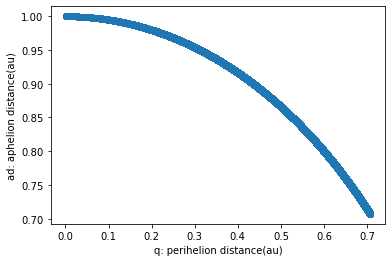

In [8]:
plt.scatter(data_scaled['q'], data_scaled['ad'])
plt.xlabel("q: perihelion distance(au)")
plt.ylabel("ad: aphelion distance(au)")

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(data_scaled[['q','ad']])
y_predicted

array([1, 0, 0, ..., 2, 0, 0])

In [11]:
data_scaled['cluster'] = y_predicted
data_scaled

,q,ad,cluster
0,0.651481,0.758665,1
1,0.530347,0.847781,0
2,0.508891,0.860831,0
3,0.641850,0.766830,1
4,0.561817,0.827262,2
...,...,...,...
839703,0.197460,0.980311,3
839704,0.506926,0.861990,0
839705,0.553057,0.833143,2
839706,0.507756,0.861501,0


No handles with labels found to put in legend.


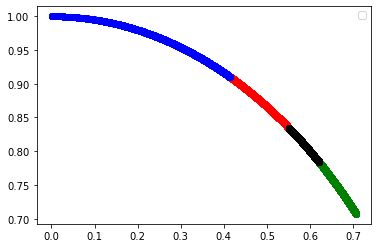

In [12]:
df1 = data_scaled[data_scaled.cluster == 0]
df2 = data_scaled[data_scaled.cluster == 1]
df3 = data_scaled[data_scaled.cluster == 2]
df4 = data_scaled[data_scaled.cluster == 3]
plt.scatter(df1.q, df1['ad'], color='red')
plt.scatter(df2.q, df2['ad'], color='green')
plt.scatter(df3.q, df3['ad'], color='black')
plt.scatter(df4.q, df4['ad'], color='blue')
plt.legend()

No handles with labels found to put in legend.


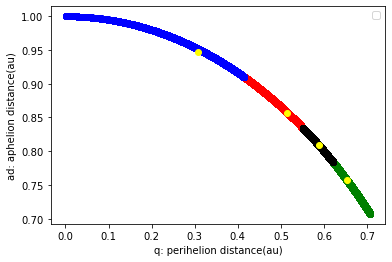

In [13]:
df1 = data_scaled[data_scaled.cluster == 0]
df2 = data_scaled[data_scaled.cluster == 1]
df3 = data_scaled[data_scaled.cluster == 2]
df4 = data_scaled[data_scaled.cluster == 3]
plt.scatter(df1.q, df1['ad'], color='red')
plt.scatter(df2.q, df2['ad'], color='green')
plt.scatter(df3.q, df3['ad'], color='black')
plt.scatter(df4.q, df4['ad'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           color = 'yellow', marker = "o")
plt.xlabel("q: perihelion distance(au)")
plt.ylabel("ad: aphelion distance(au)")
plt.legend()

Conclusion: q is perihelion distance，ad is aphelion distance.
The orbit of each planet around the sun/star is roughly an ellipse. Therefore, the distance between the planet and the sun/star is sometimes closer, sometimes farther. When it is closest to the star/sun, this point is called the perihelion, farther is called the aphelion. The 'q' and 'ad' has some kind of regression relation.